## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [21]:
im = cv2.imread('vishal.JPG')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_img = im.shape
print(im.shape)

(754, 591, 3)


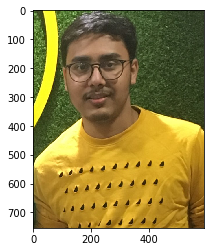

In [22]:
plt.imshow(im)
plt.show()

In [24]:
#flatten each channel of image into a linear array

all_pixels = im.reshape((754*591, 3))
print(all_pixels.shape)

#one linear array for each color (red,green,blue)

(445614, 3)


In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[174 145 128]
 [  1   0   1]
 [ 98  94 117]
 [ 38  35  64]]


# Plotting all dominant colors

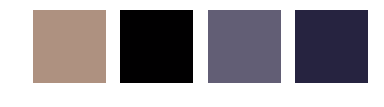

In [12]:
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    #color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting our image

In [17]:
new_img  = np.zeros((754*5,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [18]:
print(colors)

[array([174, 145, 128], dtype=uint8), array([1, 0, 1], dtype=uint8), array([ 98,  94, 117], dtype=uint8), array([38, 35, 64], dtype=uint8)]


In [19]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1])

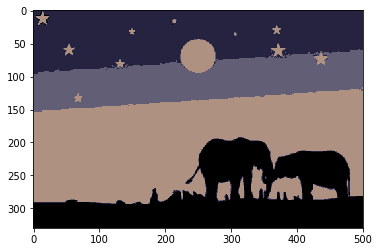

In [20]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
    
    
new_img = new_img.reshape((original_img))
plt.imshow(new_img)
plt.show()